# Validation tests

In this notebook general validation tests for the potentials are performed.

In [1]:
%config IPCompleter.evaluation='unsafe'

In [2]:
from pyiron import Project
import numpy as np
from pyiron_atomistics.atomistics.structure.structurestorage import StructureStorage
from helper import birch_murnaghan
from pychromatic import Multiplot
from pychromatic.colors import accent
import matplotlib.pyplot as plt
import pandas as pd
colors = {"g": "#1b9e77", "r": "#d95f02", "b": "#7570b3"}

2024-04-05 16:04:06,671 - pyiron_log - WARNING - pyiron found a 'templates' folder in the /home/menon/pyiron/resources resource directory. These are no longer supported in pyiron_base >=0.7.0. They are replaced by Project.create_job_class() and Project.wrap_python_function().


In [3]:
pr = Project('validation_2')

In [4]:
store = StructureStorage()

Create and add fcc and bcc for Al and Li

In [5]:
s = pr.create.structure.bulk('Al', 'fcc', 4.04)
store.add_structure(s, identifier=f'Alfcc')

for lattice in ['fcc', 'bcc']:
    s = pr.create.structure.bulk('Li', lattice, 3.5)
    store.add_structure(s, identifier=f'Li{lattice}')

for lattice in ['AlLi', 'Al2Li3', 'Al3Li', 'Al4Li9']:
    s = pr.create.structure.ase.read(f'mp_structures/{lattice}.cif')
    store.add_structure(s, identifier=lattice)

In [6]:
potentials_list = ['AlLi-EAM', 'AlLi-HDNNP', 'AlLi-ACE']

In [7]:
for pot in potentials_list:
    for i, structure in enumerate(store.iter_structures()):
        
        potname = pot.replace('-', '_')
        jobname = f'{potname}_{store.identifier[i]}'

        job_relax = pr.create.job.Lammps(jobname, delete_existing_job=True)
        job_relax.structure = structure
        job_relax.potential = pot
        job_relax.calc_minimize(pressure=0)
        job_relax.run()

        # Murnaghan
        job_ref = pr.create.job.Lammps(f"ref_job_{jobname}")
        job_ref.structure = job_relax.get_structure(-1)
        job_ref.potential = pot
        job_ref.calc_minimize()
        
        murn_job = job_ref.create_job(pr.job_type.Murnaghan, f"murn_job_{jobname}")
        murn_job.input["vol_range"] = 0.1
        murn_job.run()

The job AlLi_EAM_Alfcc was saved and received the ID: 3566
The job murn_job_AlLi_EAM_Alfcc was saved and received the ID: 3567
The job murn_job_AlLi_EAM_Alfcc_0_9 was saved and received the ID: 3568
The job murn_job_AlLi_EAM_Alfcc_0_92 was saved and received the ID: 3569
The job murn_job_AlLi_EAM_Alfcc_0_94 was saved and received the ID: 3570
The job murn_job_AlLi_EAM_Alfcc_0_96 was saved and received the ID: 3571
The job murn_job_AlLi_EAM_Alfcc_0_98 was saved and received the ID: 3572
The job murn_job_AlLi_EAM_Alfcc_1_0 was saved and received the ID: 3573
The job murn_job_AlLi_EAM_Alfcc_1_02 was saved and received the ID: 3574
The job murn_job_AlLi_EAM_Alfcc_1_04 was saved and received the ID: 3575
The job murn_job_AlLi_EAM_Alfcc_1_06 was saved and received the ID: 3576
The job murn_job_AlLi_EAM_Alfcc_1_08 was saved and received the ID: 3577
The job murn_job_AlLi_EAM_Alfcc_1_1 was saved and received the ID: 3578
The job AlLi_EAM_Lifcc was saved and received the ID: 3579
The job murn_j

In [9]:
pr.job_table()

,id,status,chemicalformula,job,subjob,projectpath,project,timestart,timestop,totalcputime,computer,hamilton,hamversion,parentid,masterid
0,3566,finished,Al,AlLi_EAM_Alfcc,/AlLi_EAM_Alfcc,None,/mnt/c/Users/menon/Documents/winrepos/projects-publication/potential_publication/03_validation/validation_2/,2024-04-05 16:04:10.491153,2024-04-05 16:04:12.288295,1.0,pyiron@cmleo26#1,Lammps,0.1,None,NaN
1,3567,finished,Al,murn_job_AlLi_EAM_Alfcc,/murn_job_AlLi_EAM_Alfcc,None,/mnt/c/Users/menon/Documents/winrepos/projects-publication/potential_publication/03_validation/validation_2/,2024-04-05 16:04:13.109838,2024-04-05 16:04:22.624949,9.0,pyiron@cmleo26#1#11/11,Murnaghan,0.3.0,None,NaN
2,3568,finished,Al,murn_job_AlLi_EAM_Alfcc_0_9,/murn_job_AlLi_EAM_Alfcc_0_9,None,/mnt/c/Users/menon/Documents/winrepos/projects-publication/potential_publication/03_validation/validation_2/murn_job_AlLi_EAM_Alfcc_hdf5/,2024-04-05 16:04:13.501263,2024-04-05 16:04:13.972492,0.0,pyiron@cmleo26#1,Lammps,0.1,None,3567.0
3,3569,finished,Al,murn_job_AlLi_EAM_Alfcc_0_92,/murn_job_AlLi_EAM_Alfcc_0_92,None,/mnt/c/Users/menon/Documents/winrepos/projects-publication/potential_publication/03_validation/validation_2/murn_job_AlLi_EAM_Alfcc_hdf5/,2024-04-05 16:04:14.294867,2024-04-05 16:04:14.788744,0.0,pyiron@cmleo26#1,Lammps,0.1,None,3567.0
4,3570,finished,Al,murn_job_AlLi_EAM_Alfcc_0_94,/murn_job_AlLi_EAM_Alfcc_0_94,None,/mnt/c/Users/menon/Documents/winrepos/projects-publication/potential_publication/03_validation/validation_2/murn_job_AlLi_EAM_Alfcc_hdf5/,2024-04-05 16:04:15.162331,2024-04-05 16:04:15.717756,0.0,pyiron@cmleo26#1,Lammps,0.1,None,3567.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,3834,finished,Al4Li9,murn_job_AlLi_ACE_Al4Li9_1_02,/murn_job_AlLi_ACE_Al4Li9_1_02,None,/mnt/c/Users/menon/Documents/winrepos/projects-publication/potential_publication/03_validation/validation_2/murn_job_AlLi_ACE_Al4Li9_hdf5/,2024-04-05 16:08:19.633313,2024-04-05 16:08:20.404461,0.0,pyiron@cmleo26#1,Lammps,0.1,None,3827.0
269,3835,finished,Al4Li9,murn_job_AlLi_ACE_Al4Li9_1_04,/murn_job_AlLi_ACE_Al4Li9_1_04,None,/mnt/c/Users/menon/Documents/winrepos/projects-publication/potential_publication/03_validation/validation_2/murn_job_AlLi_ACE_Al4Li9_hdf5/,2024-04-05 16:08:20.768208,2024-04-05 16:08:21.527048,0.0,pyiron@cmleo26#1,Lammps,0.1,None,3827.0
270,3836,finished,Al4Li9,murn_job_AlLi_ACE_Al4Li9_1_06,/murn_job_AlLi_ACE_Al4Li9_1_06,None,/mnt/c/Users/menon/Documents/winrepos/projects-publication/potential_publication/03_validation/validation_2/murn_job_AlLi_ACE_Al4Li9_hdf5/,2024-04-05 16:08:21.888138,2024-04-05 16:08:22.632251,0.0,pyiron@cmleo26#1,Lammps,0.1,None,3827.0
271,3837,finished,Al4Li9,murn_job_AlLi_ACE_Al4Li9_1_08,/murn_job_AlLi_ACE_Al4Li9_1_08,None,/mnt/c/Users/menon/Documents/winrepos/projects-publication/potential_publication/03_validation/validation_2/murn_job_AlLi_ACE_Al4Li9_hdf5/,2024-04-05 16:08:22.975881,2024-04-05 16:08:23.753527,0.0,pyiron@cmleo26#1,Lammps,0.1,None,3827.0


Collect Murnaghan Jobs in a job table

In [10]:
def get_only_murn(job_table):
    return (job_table.hamilton == "Murnaghan") & (job_table.status == "finished") 

def get_volume(job_path):
    return job_path["output/volume"]/len(job_path["output/structure/positions"])

def get_eq_bm(job_path):
    return job_path["output/equilibrium_bulk_modulus"]

def get_eq_en(job_path):
    return job_path["output/equilibrium_energy"]

def get_potential(job_path):
    return "-".join(job_path.job_name.split("_")[2:4])

def get_compound(job_path):
    return job_path.job_name.split("_")[4]

def get_energy(job_path):
    return job_path["output/energy"]/len(job_path["output/structure/positions"])

In [11]:
table = pr.create_table("table_murn", delete_existing_job=True)
#table.convert_to_object = True
table.db_filter_function = get_only_murn
table.add["potential"] = get_potential
table.add["compound"] = get_compound
table.add["volume"] = get_volume
table.add["bulk_modulus"] = get_eq_bm
table.add["energy_per_atom"] = get_energy

In [12]:
table.run()

The job table_murn was saved and received the ID: 3839


Loading and filtering jobs:   0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

/home/menon/miniconda3/envs/potentials_v0.0.2/lib/python3.11/site-packages/pyiron_base/jobs/datamining.py:651: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  self.pyiron_table._df.to_hdf(
/home/menon/miniconda3/envs/potentials_v0.0.2/lib/python3.11/site-packages/pyiron_base/jobs/datamining.py:651: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['potential', 'compound', 'volume', 'energy_per_atom'], dtype='object')]

  self.pyiron_table._df.to_hdf(
/home/menon/miniconda3/envs/potentials_v0.0.2/lib/python3.11/site-packages/pyiron_base/jobs/datamining.py:651: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  self.pyiron_table._df.to_hdf(


In [13]:
df_murn = table.get_dataframe()

Read in DFT ref data

In [14]:
df_ref = pd.read_csv("dft_ref.csv")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


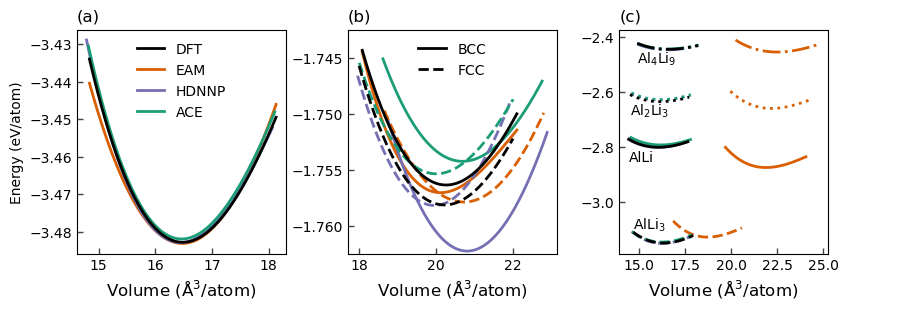

In [20]:
mlt = Multiplot(columns=3, width=700, ratio=0.3, wspace=0.3)

eam_vol, eam_en = birch_murnaghan(df_murn, "Alfcc", potential='AlLi-EAM')
hdn_vol, hdn_en = birch_murnaghan(df_murn, "Alfcc", potential='AlLi-HDNNP')
ace_vol, ace_en = birch_murnaghan(df_murn, "Alfcc", potential='AlLi-ACE')
dft_vol, dft_en = birch_murnaghan(df_ref, "Alfcc")

mlt[0,0].plot(dft_vol, dft_en, c='black', lw=2, label="DFT", zorder=10)
mlt[0,0].plot(eam_vol, eam_en, c=colors["r"], lw=2, label="EAM")
mlt[0,0].plot(hdn_vol, hdn_en, c=colors["b"], lw=2, label="HDNNP")
mlt[0,0].plot(ace_vol, ace_en, c=colors["g"], lw=2, label="ACE")

eam_vol, eam_en = birch_murnaghan(df_murn, "Libcc", potential='AlLi-EAM')
hdn_vol, hdn_en = birch_murnaghan(df_murn, "Libcc", potential='AlLi-HDNNP')
ace_vol, ace_en = birch_murnaghan(df_murn, "Libcc", potential='AlLi-ACE')
dft_vol, dft_en = birch_murnaghan(df_ref, "Libcc")

mlt[0,1].plot(dft_vol, dft_en, c='black', lw=2, label="BCC", zorder=10)
mlt[0,1].plot(eam_vol, eam_en, c=colors["r"], lw=2)
mlt[0,1].plot(hdn_vol, hdn_en, c=colors["b"], lw=2)
mlt[0,1].plot(ace_vol, ace_en, c=colors["g"], lw=2)

eam_vol, eam_en = birch_murnaghan(df_murn, "Lifcc", potential='AlLi-EAM')
hdn_vol, hdn_en = birch_murnaghan(df_murn, "Lifcc", potential='AlLi-HDNNP')
ace_vol, ace_en = birch_murnaghan(df_murn, "Lifcc", potential='AlLi-ACE')
dft_vol, dft_en = birch_murnaghan(df_ref, "Lifcc")

mlt[0,1].plot(dft_vol, dft_en, c='black', lw=2, label="FCC", zorder=10, ls='dashed')
mlt[0,1].plot(eam_vol, eam_en, c=colors["r"], lw=2, ls='dashed')
mlt[0,1].plot(hdn_vol, hdn_en, c=colors["b"], lw=2, ls='dashed')
mlt[0,1].plot(ace_vol, ace_en, c=colors["g"], lw=2, ls='dashed')

eam_vol, eam_en = birch_murnaghan(df_murn, "AlLi", potential='AlLi-EAM')
hdn_vol, hdn_en = birch_murnaghan(df_murn, "AlLi", potential='AlLi-HDNNP')
ace_vol, ace_en = birch_murnaghan(df_murn, "AlLi", potential='AlLi-ACE')
dft_vol, dft_en = birch_murnaghan(df_ref, "Al2Li2")

mlt[0,2].plot(dft_vol, dft_en, c='black', lw=2, zorder=10)
mlt[0,2].plot(eam_vol, eam_en, c=colors["r"], lw=2)
mlt[0,2].plot(hdn_vol, hdn_en, c=colors["b"], lw=2)
mlt[0,2].plot(ace_vol, ace_en, c=colors["g"], lw=2)
plt.text(min(dft_vol), min(dft_en)-0.05, r"AlLi")

eam_vol, eam_en = birch_murnaghan(df_murn, "Al3Li", potential='AlLi-EAM')
hdn_vol, hdn_en = birch_murnaghan(df_murn, "Al3Li", potential='AlLi-HDNNP')
ace_vol, ace_en = birch_murnaghan(df_murn, "Al3Li", potential='AlLi-ACE')
dft_vol, dft_en = birch_murnaghan(df_ref, "Al3Li")

mlt[0,2].plot(dft_vol, dft_en, c='black', lw=2, zorder=10, ls='dashed')
mlt[0,2].plot(eam_vol, eam_en, c=colors["r"], lw=2, ls='dashed')
mlt[0,2].plot(hdn_vol, hdn_en, c=colors["b"], lw=2, ls='dashed')
mlt[0,2].plot(ace_vol, ace_en, c=colors["g"], lw=2, ls='dashed')
plt.text(min(dft_vol), min(dft_en)+0.05, r"$\mathrm{AlLi}_3$")

eam_vol, eam_en = birch_murnaghan(df_murn, "Al4Li9", potential='AlLi-EAM')
hdn_vol, hdn_en = birch_murnaghan(df_murn, "Al4Li9", potential='AlLi-HDNNP')
ace_vol, ace_en = birch_murnaghan(df_murn, "Al4Li9", potential='AlLi-ACE')
dft_vol, dft_en = birch_murnaghan(df_ref, "Al4Li9")

mlt[0,2].plot(dft_vol, dft_en, c='black', lw=2, zorder=10, ls='dashdot')
mlt[0,2].plot(eam_vol, eam_en, c=colors["r"], lw=2, ls='dashdot')
mlt[0,2].plot(hdn_vol, hdn_en, c=colors["b"], lw=2, ls='dashdot')
mlt[0,2].plot(ace_vol, ace_en, c=colors["g"], lw=2, ls='dashdot')
plt.text(min(dft_vol), min(dft_en)-0.05, r"$\mathrm{Al_4Li_9}$")

eam_vol, eam_en = birch_murnaghan(df_murn, "Al2Li3", potential='AlLi-EAM')
hdn_vol, hdn_en = birch_murnaghan(df_murn, "Al2Li3", potential='AlLi-HDNNP')
ace_vol, ace_en = birch_murnaghan(df_murn, "Al2Li3", potential='AlLi-ACE')
dft_vol, dft_en = birch_murnaghan(df_ref, "Al2Li3")

mlt[0,2].plot(dft_vol, dft_en, c='black', lw=2, zorder=10, ls='dotted')
mlt[0,2].plot(eam_vol, eam_en, c=colors["r"], lw=2, ls='dotted')
mlt[0,2].plot(hdn_vol, hdn_en, c=colors["b"], lw=2, ls='dotted')
mlt[0,2].plot(ace_vol, ace_en, c=colors["g"], lw=2, ls='dotted')
plt.text(min(dft_vol), min(dft_en)-0.05, r"$\mathrm{Al_2Li_3}$")

mlt[0,0].legend(frameon=False)
mlt[0,1].legend(frameon=False)
mlt[0,2].legend(frameon=False, bbox_to_anchor=[1.45, 0.5])

mlt[0,0].set_xlabel(r"Volume ($\mathrm{\AA}^3/$atom)", fontsize=12)
mlt[0,1].set_xlabel(r"Volume ($\mathrm{\AA}^3/$atom)", fontsize=12)
mlt[0,2].set_xlabel(r"Volume ($\mathrm{\AA}^3/$atom)", fontsize=12)
mlt[0,0].set_ylabel(r"Energy (eV/atom)")
mlt[0,0].set_title(r"(a)", loc='left', fontsize=12)
mlt[0,1].set_title(r"(b)", loc='left', fontsize=12)
mlt[0,2].set_title(r"(c)", loc='left', fontsize=12)
mlt[0,1].set_ylim(-1.7625, -1.7425)
plt.savefig("img_ev_curve.png", dpi=300, bbox_inches='tight')

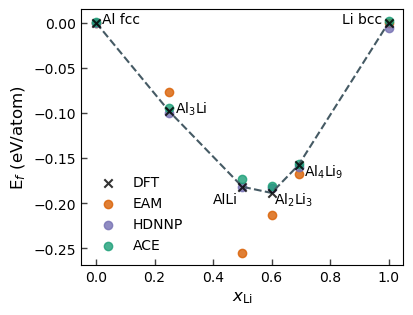

In [24]:
al_dft = min(birch_murnaghan(df_ref, "Alfcc")[1])
li_dft = min(birch_murnaghan(df_ref, "Libcc")[1])

c0 = 0
s0_dft = min(birch_murnaghan(df_ref, "Alfcc")[1]) - ((1-c0)*al_dft + c0*li_dft) 
s0_eam = min(birch_murnaghan(df_murn, "Alfcc", potential='AlLi-EAM')[1]) - ((1-c0)*al_dft + c0*li_dft)
s0_hdn = min(birch_murnaghan(df_murn, "Alfcc", potential='AlLi-HDNNP')[1]) - ((1-c0)*al_dft + c0*li_dft)
s0_ace = min(birch_murnaghan(df_murn, "Alfcc", potential='AlLi-ACE')[1]) - ((1-c0)*al_dft + c0*li_dft)

c1 = 1/(1+3)
s1_dft = min(birch_murnaghan(df_ref, "Al3Li")[1]) - ((1-c1)*al_dft + c1*li_dft) 
s1_eam = min(birch_murnaghan(df_murn, "Al3Li", potential='AlLi-EAM')[1]) - ((1-c1)*al_dft + c1*li_dft)
s1_hdn = min(birch_murnaghan(df_murn, "Al3Li", potential='AlLi-HDNNP')[1]) - ((1-c1)*al_dft + c1*li_dft)
s1_ace = min(birch_murnaghan(df_murn, "Al3Li", potential='AlLi-ACE')[1]) - ((1-c1)*al_dft + c1*li_dft)

c2 = 1/(1+1)
s2_dft = min(birch_murnaghan(df_ref, "Al2Li2")[1]) - ((1-c2)*al_dft + c2*li_dft) 
s2_eam = min(birch_murnaghan(df_murn, "AlLi", potential='AlLi-EAM')[1]) - ((1-c2)*al_dft + c2*li_dft)
s2_hdn = min(birch_murnaghan(df_murn, "AlLi", potential='AlLi-HDNNP')[1]) - ((1-c2)*al_dft + c2*li_dft)
s2_ace = min(birch_murnaghan(df_murn, "AlLi", potential='AlLi-ACE')[1]) - ((1-c2)*al_dft + c2*li_dft)

c3 = 3/(3+2)
s3_dft = min(birch_murnaghan(df_ref, "Al2Li3")[1]) - ((1-c3)*al_dft + c3*li_dft) 
s3_eam = min(birch_murnaghan(df_murn, "Al2Li3", potential='AlLi-EAM')[1]) - ((1-c3)*al_dft + c3*li_dft)
s3_hdn = min(birch_murnaghan(df_murn, "Al2Li3", potential='AlLi-HDNNP')[1]) - ((1-c3)*al_dft + c3*li_dft)
s3_ace = min(birch_murnaghan(df_murn, "Al2Li3", potential='AlLi-ACE')[1]) - ((1-c3)*al_dft + c3*li_dft)

c4 = 9/(4+9)
s4_dft = min(birch_murnaghan(df_ref, "Al4Li9")[1]) - ((1-c4)*al_dft + c4*li_dft) 
s4_eam = min(birch_murnaghan(df_murn, "Al4Li9", potential='AlLi-EAM')[1]) - ((1-c4)*al_dft + c4*li_dft)
s4_hdn = min(birch_murnaghan(df_murn, "Al4Li9", potential='AlLi-HDNNP')[1]) - ((1-c4)*al_dft + c4*li_dft)
s4_ace = min(birch_murnaghan(df_murn, "Al4Li9", potential='AlLi-ACE')[1]) - ((1-c4)*al_dft + c4*li_dft)

c5 = 1
s5_dft = min(birch_murnaghan(df_ref, "Libcc")[1]) - ((1-c5)*al_dft + c5*li_dft) 
s5_eam = min(birch_murnaghan(df_murn, "Libcc", potential='AlLi-EAM')[1]) - ((1-c5)*al_dft + c5*li_dft) 
s5_hdn = min(birch_murnaghan(df_murn, "Libcc", potential='AlLi-HDNNP')[1]) - ((1-c5)*al_dft + c5*li_dft) 
s5_ace = min(birch_murnaghan(df_murn, "Libcc", potential='AlLi-ACE')[1]) - ((1-c5)*al_dft + c5*li_dft) 

mlt = Multiplot(width=300, ratio=0.8, )#wspace=0.3)

a=0.8
mlt[0,0].scatter([c0, c1, c2, c3, c4, c5], [s0_dft, s1_dft, s2_dft, s3_dft, s4_dft, s5_dft], c='black', marker='x', alpha=a, label='DFT', zorder=10)
mlt[0,0].scatter([c0, c1, c2, c3, c4, c5], [s0_eam, s1_eam, s2_eam, s3_eam, s4_eam, s5_eam], c=colors["r"], alpha=a, label='EAM')
mlt[0,0].scatter([c0, c1, c2, c3, c4, c5], [s0_hdn, s1_hdn, s2_hdn, s3_hdn, s4_hdn, s5_hdn], c=colors["b"], alpha=a, label='HDNNP')
mlt[0,0].scatter([c0, c1, c2, c3, c4, c5], [s0_ace, s1_ace, s2_ace, s3_ace, s4_ace, s5_ace], c=colors["g"], alpha=a, label='ACE')

mlt[0,0].plot([0, c1, c2, c3, c4, 1], [0, s1_dft, s2_dft, s3_dft, s4_dft, 0], c=accent['lgrey'], ls='dashed')
mlt[0,0].legend(frameon=False)
mlt[0,0].set_xlabel(r"$x_\mathrm{Li}$",fontsize="12")
mlt[0,0].set_ylabel(r"E$_f$ (eV/atom)",fontsize="12")

plt.text(0.02, -0.00, 'Al fcc')
plt.text(0.27, -0.10, r'Al$_3$Li')
plt.text(0.4, -0.20, r'AlLi')
plt.text(0.61, -0.20, r'Al$_2$Li$_3$')
plt.text(0.71, -0.17, r'Al$_4$Li$_9$')
plt.text(0.84, -0.00, 'Li bcc')
plt.savefig("img_convex_hull.png", dpi=300, bbox_inches='tight')